In [2]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [3]:
# parameters setup

imgs_path = "/content/drive/MyDrive/dataset/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5 # number of most similar images to retrieve

In [5]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "png" or "jpg" in x][:2000]

print("number of images:",len(files))

number of images: 2000


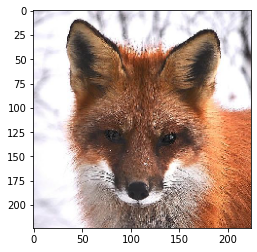

image loaded successfully!


In [11]:
# load an image in PIL format
original = load_img(files[0], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [12]:
# convert the PIL image to a numpy array
# in PIL - image is in (width, height, channel)
# in Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)

# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [13]:
# convert the PIL image to a numpy array
# in PIL - image is in (width, height, channel)
# in Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)

# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [14]:
# get the extracted features
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

features successfully extracted!
number of image features: 4096


array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
# load all the images and prepare them for feeding into the CNN

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [16]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(2000, 4096)

In [17]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,/content/drive/MyDrive/dataset/4656.jpg,/content/drive/MyDrive/dataset/2534.jpg,/content/drive/MyDrive/dataset/1375.jpg,/content/drive/MyDrive/dataset/3251.jpg,/content/drive/MyDrive/dataset/880.jpg,/content/drive/MyDrive/dataset/2305.jpg,/content/drive/MyDrive/dataset/1200.jpg,/content/drive/MyDrive/dataset/2673.jpg,/content/drive/MyDrive/dataset/2040.jpg,/content/drive/MyDrive/dataset/887.jpg,/content/drive/MyDrive/dataset/2222.jpg,/content/drive/MyDrive/dataset/872.jpg,/content/drive/MyDrive/dataset/3018.jpg,/content/drive/MyDrive/dataset/3339.jpg,/content/drive/MyDrive/dataset/1362.jpg,/content/drive/MyDrive/dataset/763.jpg,/content/drive/MyDrive/dataset/863.jpg,/content/drive/MyDrive/dataset/392.jpg,/content/drive/MyDrive/dataset/2972.jpg,/content/drive/MyDrive/dataset/3135.jpg,/content/drive/MyDrive/dataset/402.jpg,/content/drive/MyDrive/dataset/4488.jpg,/content/drive/MyDrive/dataset/77.jpg,/content/drive/MyDrive/dataset/4487.jpg,/content/drive/MyDrive/dataset/3179.jpg,/content/drive/MyDrive/dataset/1386.jpg,/content/drive/MyDrive/dataset/3099.jpg,/content/drive/MyDrive/dataset/2595.jpg,/content/drive/MyDrive/dataset/1390.jpg,/content/drive/MyDrive/dataset/2910.jpg,/content/drive/MyDrive/dataset/3956.jpg,/content/drive/MyDrive/dataset/3963.jpg,/content/drive/MyDrive/dataset/1478.jpg,/content/drive/MyDrive/dataset/2756.jpg,/content/drive/MyDrive/dataset/1860.jpg,/content/drive/MyDrive/dataset/317.jpg,/content/drive/MyDrive/dataset/457.jpg,/content/drive/MyDrive/dataset/2913.jpg,/content/drive/MyDrive/dataset/1388.jpg,/content/drive/MyDrive/dataset/1561.jpg,...,/content/drive/MyDrive/dataset/4389.jpg,/content/drive/MyDrive/dataset/3565.jpg,/content/drive/MyDrive/dataset/3551.jpg,/content/drive/MyDrive/dataset/505.jpg,/content/drive/MyDrive/dataset/1728.jpg,/content/drive/MyDrive/dataset/1688.jpg,/content/drive/MyDrive/dataset/3343.jpg,/content/drive/MyDrive/dataset/2097.jpg,/content/drive/MyDrive/dataset/3594.jpg,/content/drive/MyDrive/dataset/2995.jpg,/content/drive/MyDrive/dataset/3064.jpg,/content/drive/MyDrive/dataset/624.jpg,/content/drive/MyDrive/dataset/2002.jpg,/content/drive/MyDrive/dataset/3442.jpg,/content/drive/MyDrive/dataset/4141.jpg,/content/drive/MyDrive/dataset/2482.jpg,/content/drive/MyDrive/dataset/1455.jpg,/content/drive/MyDrive/dataset/494.jpg,/content/drive/MyDrive/dataset/1480.jpg,/content/drive/MyDrive/dataset/3022.jpg,/content/drive/MyDrive/dataset/183.jpg,/content/drive/MyDrive/dataset/2622.jpg,/content/drive/MyDrive/dataset/2934.jpg,/content/drive/MyDrive/dataset/688.jpg,/content/drive/MyDrive/dataset/1131.jpg,/content/drive/MyDrive/dataset/2738.jpg,/content/drive/MyDrive/dataset/284.jpg,/content/drive/MyDrive/dataset/574.jpg,/content/drive/MyDrive/dataset/3675.jpg,/content/drive/MyDrive/dataset/451.jpg,/content/drive/MyDrive/dataset/2529.jpg,/content/drive/MyDrive/dataset/1125.jpg,/content/drive/MyDrive/dataset/1652.jpg,/content/drive/MyDrive/dataset/3653.jpg,/content/drive/MyDrive/dataset/1571.jpg,/content/drive/MyDrive/dataset/3141.jpg,/content/drive/MyDrive/dataset/4420.jpg,/content/drive/MyDrive/dataset/1691.jpg,/content/drive/MyDrive/dataset/3380.jpg,/content/drive/MyDrive/dataset/4383.jpg
/content/drive/MyDrive/dataset/4656.jpg,1.000000,0.515088,0.152611,0.195658,0.112531,0.123840,0.190368,0.080950,0.176584,0.565282,0.101151,0.179335,0.120774,0.173641,0.184086,0.496769,0.166717,0.793785,0.759184,0.766744,0.799806,0.144969,0.193943,0.177562,0.171677,0.165866,0.158622,0.874684,0.141405,0.825490,0.193283,0.251332,0.217429,0.110472,0.151206,0.787807,0.110822,0.136125,0.797781,0.274287,...,0.116252,0.752789,0.141842,0.212422,0.173039,0.147509,0.176866,0.213927,0.211024,0.136040,0.753147,0.153296,0.078628,0.135169,0.273652,0.152850,0.881046,0.265515,0.792998,0.172497,0.328656,0.241174,0.245973,0.174369,0.671817,0.184995,0.794219,0.765132,0.224190,0.203803,0.585711,0.821119,0.173465,0.292467,0.147734,0.104647,0.727996,0.131605,0.144482,0.747794
/content/drive/MyDrive/dataset/2534.jpg,0.515088,1

In [18]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


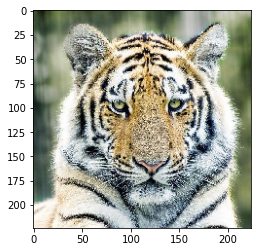

-----------------------------------------------------------------------
most similar products:


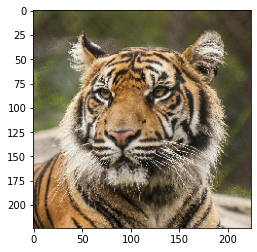

similarity score :  0.9003562


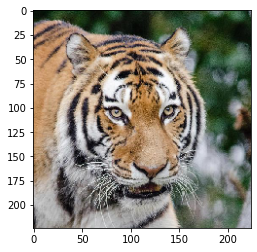

similarity score :  0.89494455


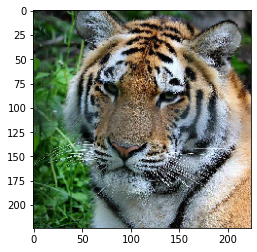

similarity score :  0.8881682


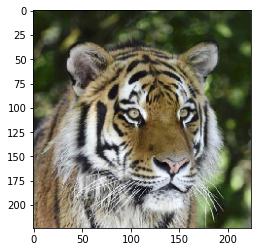

similarity score :  0.88602537


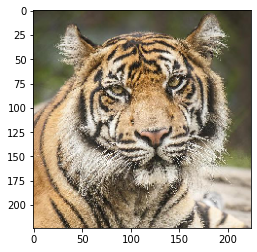

similarity score :  0.8848617


In [20]:
retrieve_most_similar_products(files[3])